In [3]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#隐藏警告
import warnings
warnings.filterwarnings('ignore')

# problem1

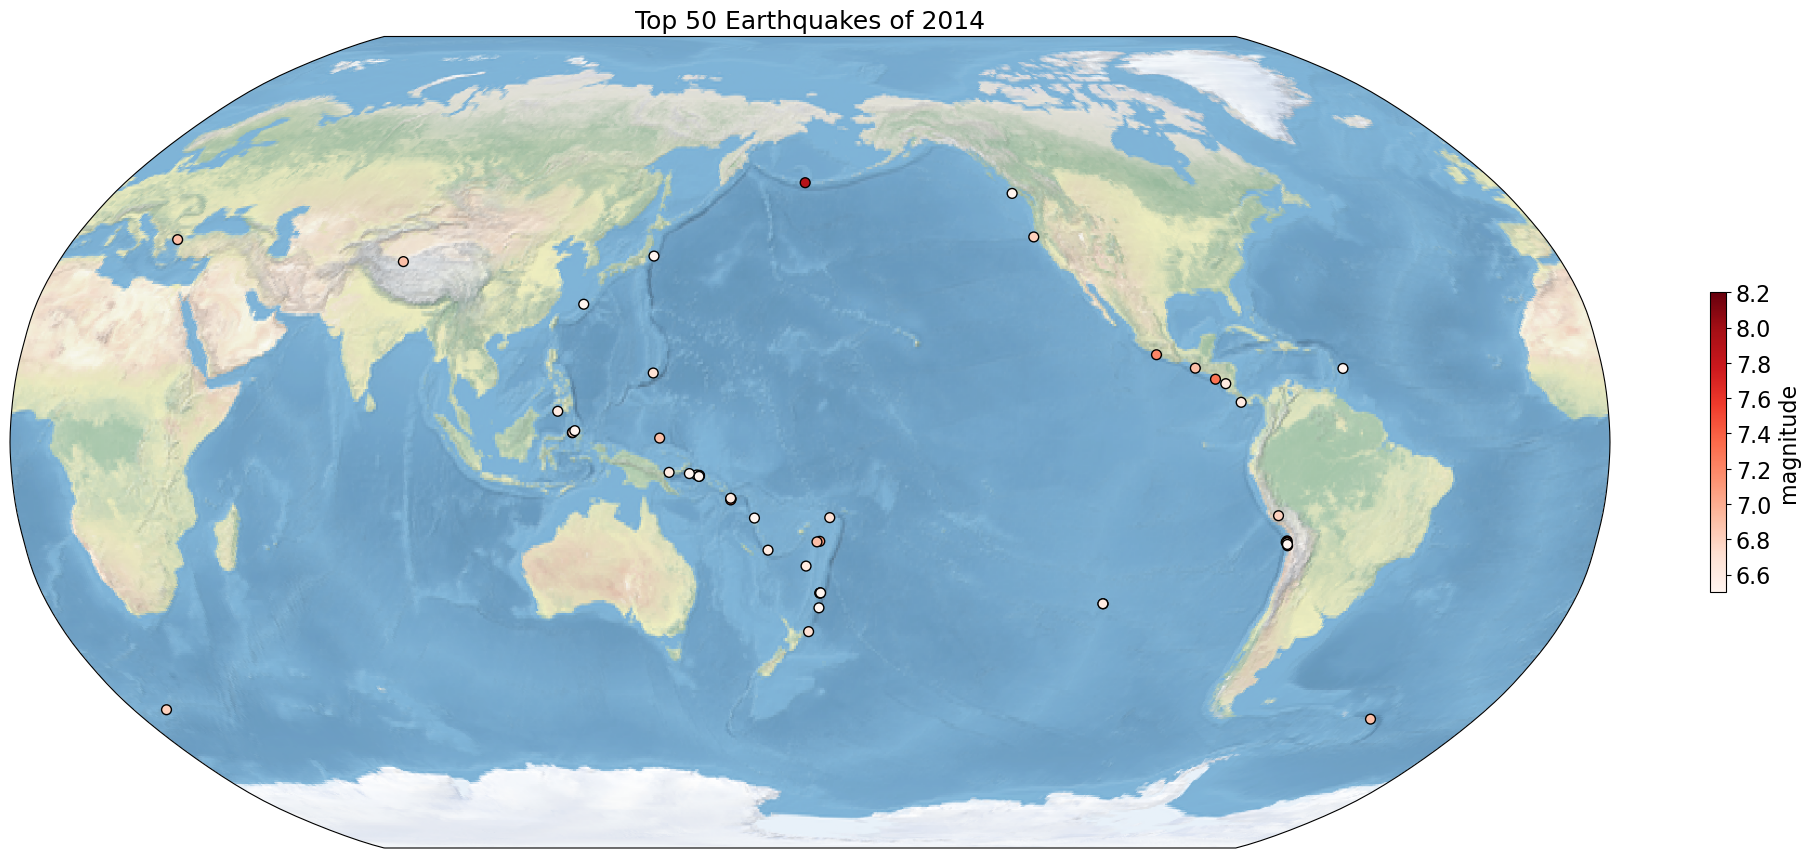

In [61]:
# problem1
#读取数据
Sig_Eqs = pd.read_csv('usgs_earthquakes.csv')
#将数据中按mag排序得到前五十个数据点绘图
Sig_Eqs1=Sig_Eqs.sort_values('mag',ascending=False).head(50)[['latitude','longitude','mag']]
#设置画布，让图片排版得下
fig=plt.figure(figsize=(20,30),dpi=100)
#设置背景为Robinson投影下经度180为中心的自然地球背景图
ax=fig.add_axes([0,0,0.8,0.9],projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
#将数据以特征值散点图的形式绘制，x坐标为经度，y坐标为纬度，颜色程度显示的是mag
ax.scatter(Sig_Eqs1['longitude'],Sig_Eqs1['latitude'],c=Sig_Eqs1['mag'],transform=ccrs.PlateCarree(),marker='o',s=50,edgecolors='k',
           linewidths=1,cmap='Reds')
#颜色条放置的位置，调整其在图片中的比例位置以及本身宽度高度
cbar_ax=fig.add_axes([0.85,0.4,0.008,0.1])#绘制颜色条位置在地图的左边正中间，比例坐标由地图[0,0,0.8,0.9]得
#设置颜色条的位置，颜色，上下限，显示刻度，竖直放置。(颜色条的设置由陈禹凡讲解)
cbar=mpl.colorbar.ColorbarBase(cbar_ax,cmap='Reds',norm=mpl.colors.Normalize(6.5,8.2),ticks=list(np.linspace(6.6,8.2,9)),
                               orientation='vertical')
#添加颜色条标题
cbar.ax.set_ylabel('magnitude',fontsize=16)
#设置颜色条刻度
cbar.ax.tick_params(labelsize=16)
#添加图片标题
ax.set_title('Top 50 Earthquakes of 2014',fontsize=18)
plt.show()
#显示的点存在一些不同，这是因为前50个排序时最后一个mag数值6.5存在多个地区，全部列入时超过50个，因此选点会和题给图的50个有不同

# problem2

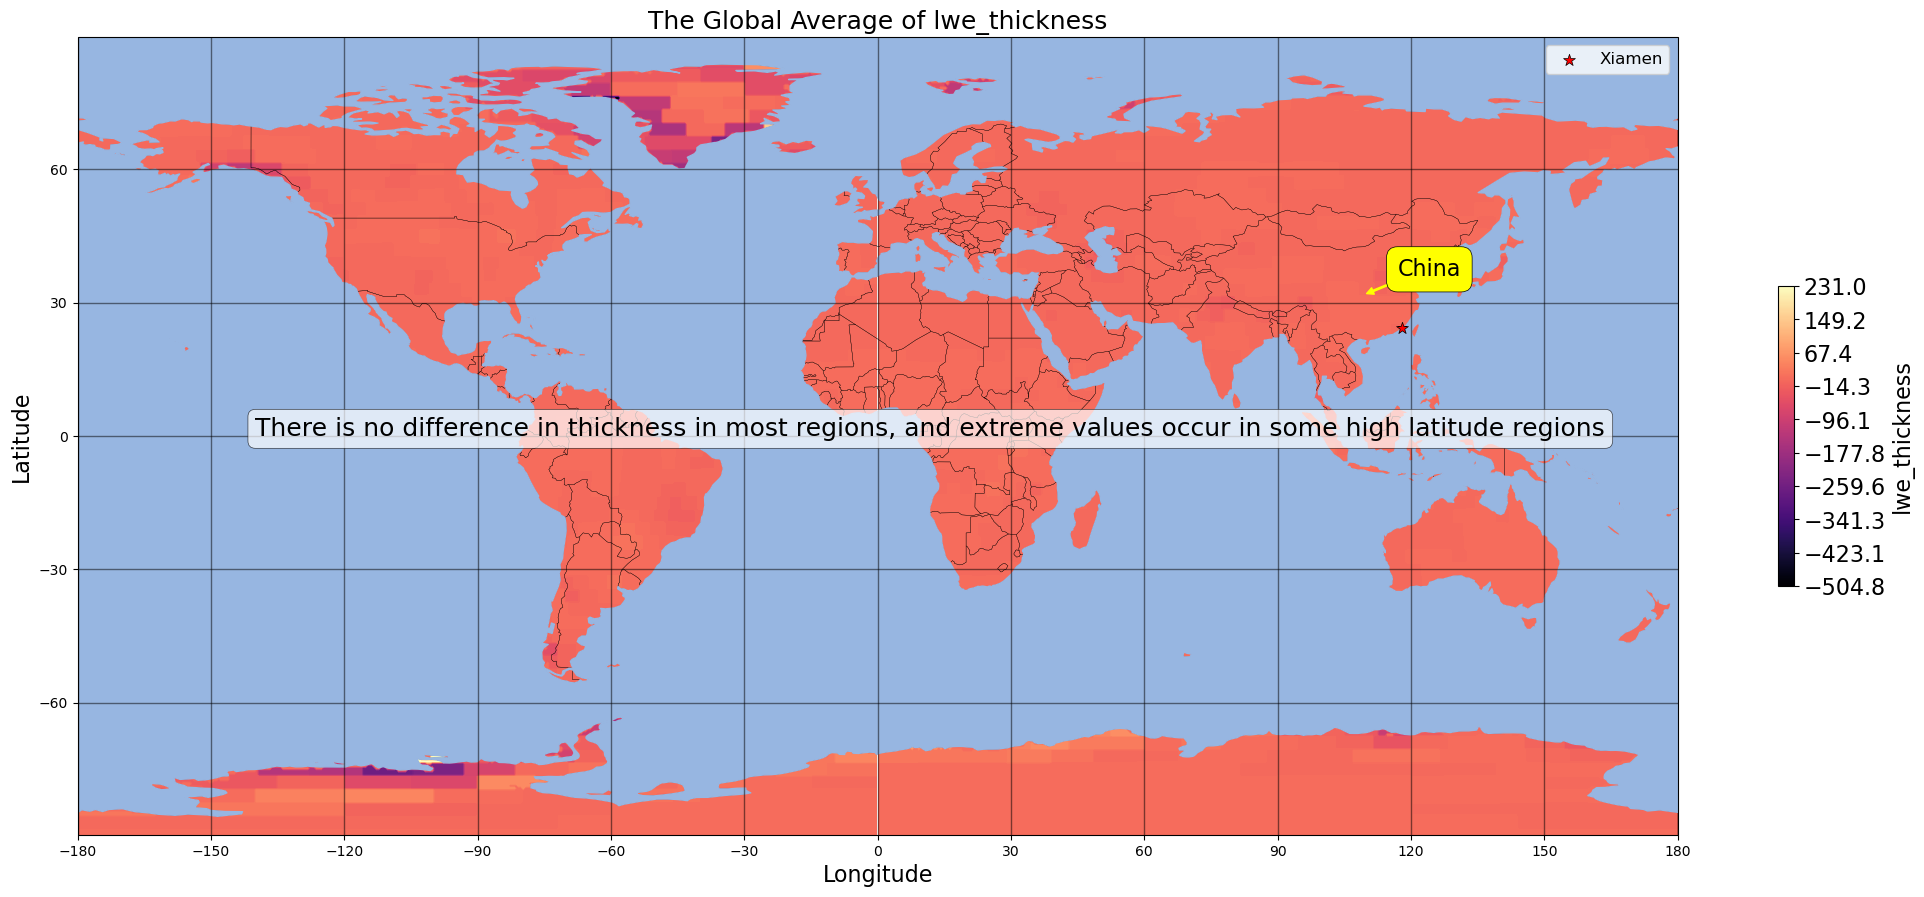

In [115]:
# 读取文件
df1= xr.open_dataset("GRCTellus.JPL.200204_202012.GLO.RL06M.MSCNv02CRI.nc", engine="netcdf4")
#problem2.1
#生成按时间平均的数据集
df0=df1.lwe_thickness.mean(dim=('time'))
#设置画布，让图片排版得下
fig=plt.figure(figsize=(20,30),dpi=100)
#设置背景为PlateCarree投影下经度0为中心
ax=fig.add_axes([0,0,0.8,0.9],projection=ccrs.PlateCarree(central_longitude=0))
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2,zorder=2)) 
#不显示海洋地区
ax.add_feature(cfeature.OCEAN,zorder=2)
#绘制数据
df0.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
               vmin=df0.min(), vmax=df0.max(), levels=100, cmap='magma',
               add_colorbar=False,zorder=1)
#颜色条放置的位置，调整其在图片中的比例位置以及本身宽度高度
cbar_ax=fig.add_axes([0.85,0.4,0.008,0.1])#绘制颜色条位置在地图的左边正中间，比例坐标由地图[0,0,0.8,0.9]得
#设置颜色条的位置，颜色，上下限，显示刻度，竖直放置。(颜色条的设置由陈禹凡讲解)
cbar=mpl.colorbar.ColorbarBase(cbar_ax,cmap='magma',norm=mpl.colors.Normalize(df0.min(),df0.max()),
                               ticks=list(np.linspace(df0.min(),df0.max(),10)),
                               orientation='vertical')
#添加颜色条标题
cbar.ax.set_ylabel('lwe_thickness',fontsize=16)
#设置颜色条刻度
cbar.ax.tick_params(labelsize=16)
#添加图片标题
ax.set_title('The Global Average of lwe_thickness',fontsize=18)
#x (经度)标题及刻度
#ax.tick_params(labelsize=16)
ax.set_xticks(np.linspace(-180,180,13))
ax.set_xlabel('Longitude',fontsize=16)
# y(纬度)标题及刻度
ax.set_yticks(np.linspace(-90,90,7))
ax.set_ylabel('Latitude',fontsize=16)
# 栅格线添加
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
#文本框添加,陈禹凡讲解
ax. text(-140,0,'There is no difference in thickness in most regions, and extreme values occur in some high latitude regions',
         fontsize=18,bbox=dict(boxstyle='round,pad=0.3', fc='white',ec='black',lw=0.5 ,alpha=0.7))
#legend设定,陈禹凡讲解
ax.scatter(118.04,24.26,s=80,c='r',marker='*',label='Xiamen',ec='k',lw=0.5,zorder=3)
ax.legend(loc=1,fontsize=12)
#注释，陈禹凡讲解
ax.annotate('China',xy=(110,32),xytext=(117,36),fontsize=16,arrowprops=dict(width=1,headwidth=5,headlength=5,color='Yellow'),
            bbox=dict(boxstyle='round,pad=0.5',fc='Yellow',lw=0.5 ))
plt.show()

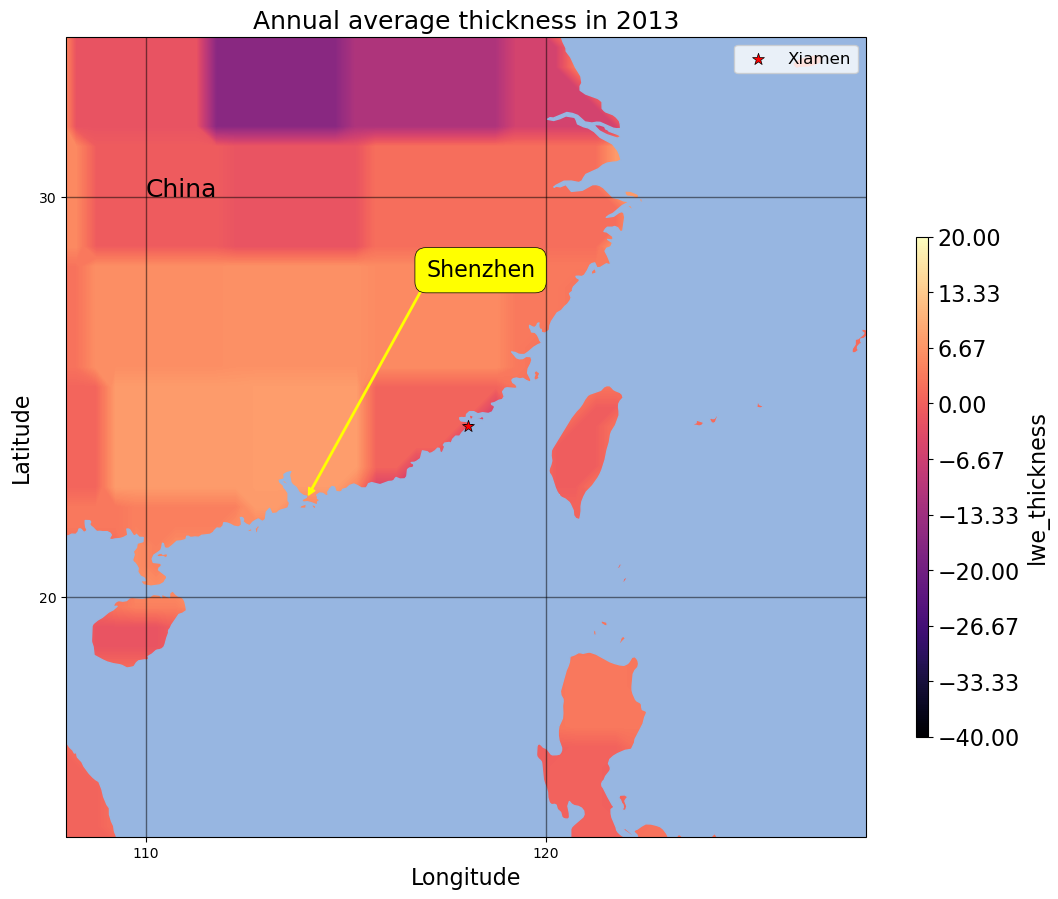

In [146]:
#problem2.2
#处理数据
df2=df1.lwe_thickness.sel(time='2013').mean(dim=('time'))
#设置画布，让图片排版得下
fig=plt.figure(figsize=(10,10),dpi=100)
#设置背景为PlateCarree投影下经度0为中心
ax=fig.add_axes([0,0,0.8,0.9],projection=ccrs.PlateCarree()) 
#绘制数据
df2.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),
               vmin=-40, vmax=20, levels=500, cmap='magma',
               add_colorbar=False,zorder=1)
# 栅格线添加
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator([10,20,30])
gl.xlocator = mticker.FixedLocator([100,110,120])
#x (经度)标题及刻度
ax.set_xticks([100,110,120])
ax.set_xlabel('Longitude',fontsize=16)
# y(纬度)标题及刻度
ax.set_yticks([10,20,30])
ax.set_ylabel('Latitude',fontsize=16)
# Set Orthographic projection style
central_lon, central_lat = 118, 24 # xiamen
proj = ccrs.Orthographic(central_lon, central_lat)
# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)
#不显示海洋地区
ax.add_feature(cfeature.OCEAN,zorder=2)
#颜色条放置的位置，调整其在图片中的比例位置以及本身宽度高度
cbar_ax=fig.add_axes([0.85,0.15,0.012,0.5])#绘制颜色条位置在地图的左边正中间，比例坐标由地图[0,0,0.8,0.9]得
#设置颜色条的位置，颜色，上下限，显示刻度，竖直放置。(颜色条的设置由陈禹凡讲解)
cbar=mpl.colorbar.ColorbarBase(cbar_ax,cmap='magma',norm=mpl.colors.Normalize(-40,20),
                               ticks=list(np.linspace(-40,20,10)),
                               orientation='vertical')
#添加颜色条标题
cbar.ax.set_ylabel('lwe_thickness',fontsize=16)
#设置颜色条刻度
cbar.ax.tick_params(labelsize=16)
#添加图片标题
ax.set_title('Annual average thickness in 2013',fontsize=18)
#legend设定,陈禹凡讲解
ax.scatter(118.04,24.26,s=80,c='r',marker='*',label='Xiamen',ec='k',lw=0.5,zorder=3)
ax.legend(loc=1,fontsize=12)
#文本框添加
ax. text(110,30,'China',fontsize=18,alpha=1,color='w')
#注释，陈禹凡讲解
ax.annotate('Shenzhen',xy=(114.06, 22.54),xytext=(117, 28),fontsize=16,arrowprops=dict(width=1,headwidth=5,headlength=5,color='Yellow'),
            bbox=dict(boxstyle='round,pad=0.5',fc='Yellow',lw=0.5 ))
plt.show()